# Лабораторная работа 1
## Выполнил: Звонарев А.Е. ИУ5-24М
## Датасет: FIFA 21 игроки

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.impute import KNNImputer
warnings.filterwarnings("ignore")

In [4]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)    
plt.rc('axes', labelsize=14)   
plt.rc('xtick', labelsize=13)  
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)  
plt.rc('font', size=13)
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [91]:
df_fifa21 = pd.read_csv('players_21.csv')

In [92]:
country = ['Russia', 'Germany', 'England', 'Brazil', 'Argentina']
df_country = df_fifa21[df_fifa21['nationality'].isin(country)]

In [93]:
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']].sort_values('overall', ascending=False)
barplot

,nationality,overall
1,Brazil,70.961669
4,Russia,70.207792
0,Argentina,67.793803
3,Germany,65.689655
2,England,62.878338


In [94]:
barplot_2 = df_country.groupby(['nationality'], as_index=False).count()[['nationality', 'rb']].sort_values('rb', ascending=False)
barplot_2

,nationality,rb
2,England,1685
3,Germany,1189
0,Argentina,936
1,Brazil,887
4,Russia,77


### 1. Рассмотрим количество игроков с разной национальностью и найдем их средний рейтинг

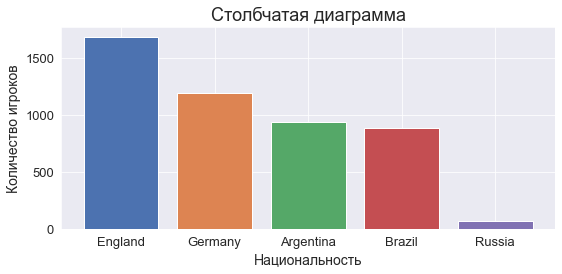

In [95]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('deep')
plt.bar(barplot_2['nationality'], barplot_2['rb'], color=colors[:5])
plt.xlabel('Национальность')
plt.ylabel('Количество игроков')
plt.title('Столбчатая диаграмма')
plt.show()

### Как можно заметить данный график не является достаточно репрезентативным в связи с малым числом игроков в России

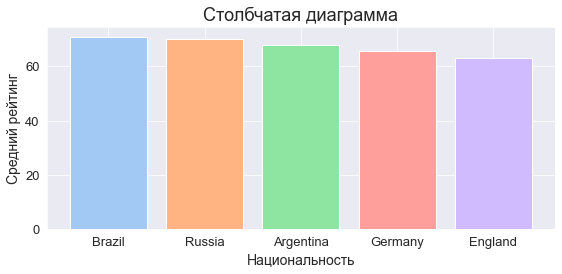

In [96]:
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'], color=colors[:5])
plt.xlabel('Национальность')
plt.ylabel('Средний рейтинг')
plt.title('Столбчатая диаграмма')
plt.show()

### При выборе топ20 игроков картинка становится яснее

In [97]:
# Подготовка данных ['Russia', 'Germany', 'England', 'Brazil', 'Argentina']
new_df = pd.concat(
[df_country[df_country['nationality']=='Russia'][:20], 
 df_country[df_country['nationality']=='Germany'][:20], 
 df_country[df_country['nationality']=='England'][:20], 
 df_country[df_country['nationality']=='Brazil'][:20], 
 df_country[df_country['nationality']=='Argentina'][:20]]
)
barplot = new_df.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]

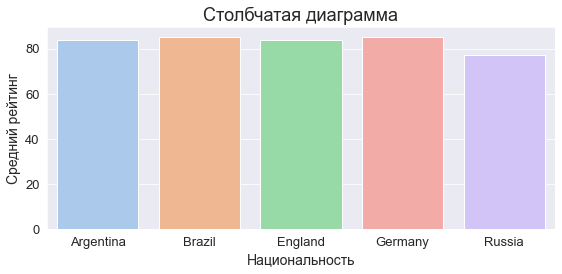

In [98]:
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['overall'], palette='pastel', ci=None)
ax.set(title='Столбчатая диаграмма', xlabel='Национальность', ylabel='Средний рейтинг')
plt.show()

### Игроки в других лигах

In [99]:
# Подготовка данных
barplot = df_country[df_country['league_name'].isin(['Spain Primera Division', 'Italian Serie A', 'French Ligue 1'])]
barplot = barplot.groupby(['nationality', 'league_name'], as_index=False).count()

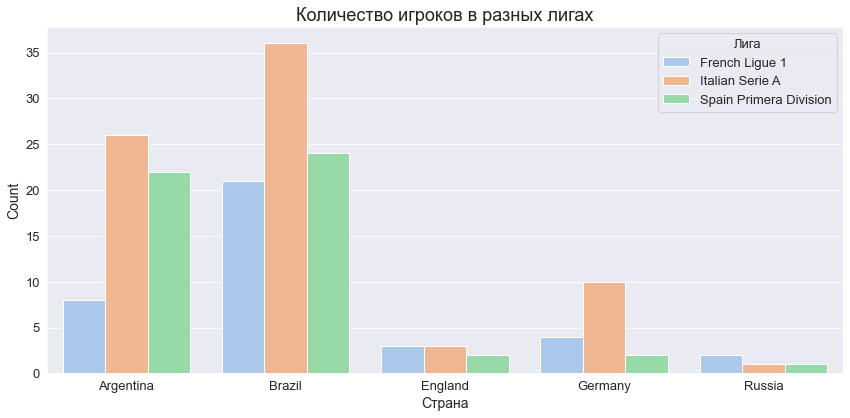

In [45]:
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=barplot['nationality'], y=barplot['sofifa_id'], hue=barplot['league_name'], palette='pastel')
ax.set(title='Количество игроков в разных лигах' ,xlabel='Страна', ylabel='Count')
ax.legend(title='Лига', title_fontsize='13', loc='upper right')
plt.show()

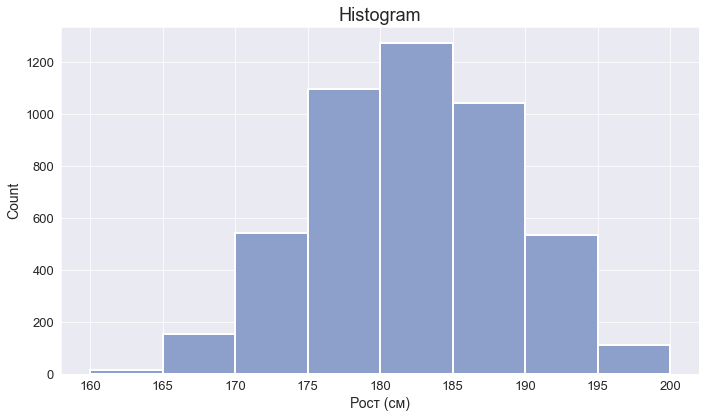

In [47]:
plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
# matplotlib
plt.hist(df_country['height_cm'], bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
plt.title('Гистограмма')
plt.xlabel('Рост (см)')
plt.ylabel('Число игроков')
# seaborn
ax = sns.histplot(data=df_country, x='height_cm', bins=bins, color=sns.color_palette('Set2')[2], linewidth=2)
ax.set(title='Гистограмма', xlabel='Рост (см)', ylabel='Количество')
plt.show()

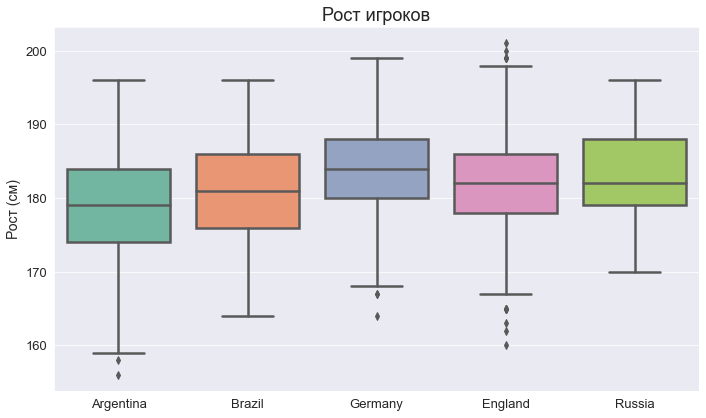

In [49]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=df_country, x='nationality', y='height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Рост игроков', xlabel='', ylabel='Рост (см)')
plt.show()

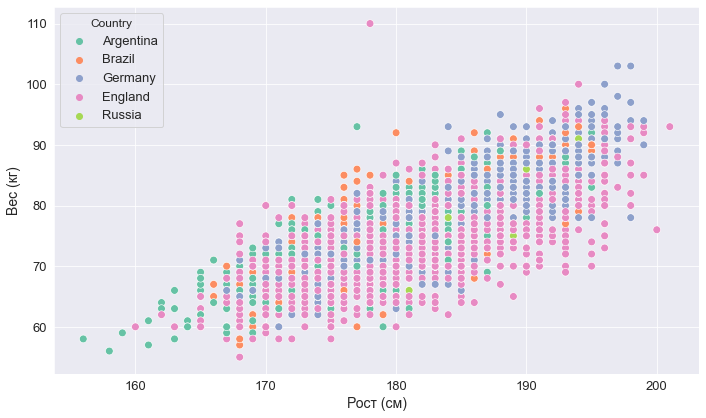

In [51]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.scatterplot(data=df_country, x='height_cm', y='weight_kg',   hue='nationality', palette='Set2', s=60)
ax.set(xlabel='Рост (см)', ylabel='Вес (кг)')
ax.legend(title='Страна', title_fontsize = 12) 
plt.show()

In [81]:
# Preprocessing
piechart = df_fifa21[df_fifa21['club_name']=='Chelsea']
piechart = piechart.sort_values('value_eur', ascending=False)[['short_name', 'value_eur']]
piechart = piechart[:11]

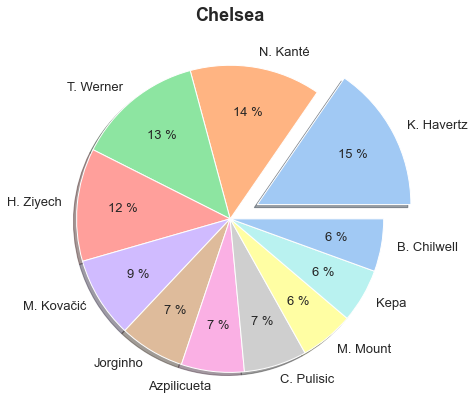

In [82]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
plt.title('Chelsea', weight='bold')
plt.show()

In [68]:
piechart2 = df_fifa21[df_fifa21['nationality']=='Russia']

In [71]:
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]

In [72]:
len(piechart2)

10

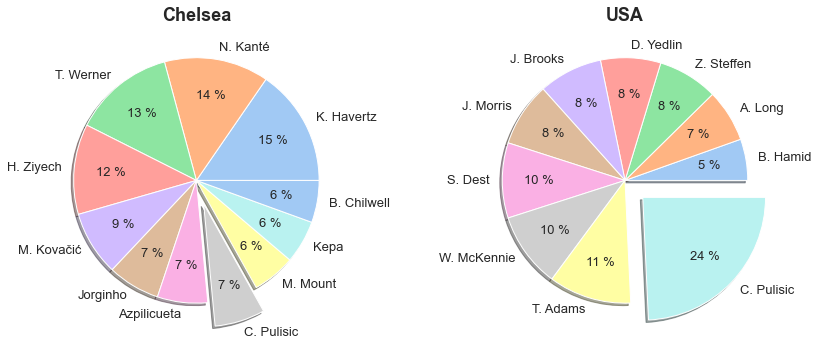

In [87]:
#subplots
fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout=True)
# Preprocessing
piechart2 = df_fifa21[df_fifa21['nationality']=='United States']
piechart2 = piechart2[:10].sort_values('value_eur')[['short_name', 'value_eur']]
сolors = sns.color_palette('pastel')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0]
ax[0].pie(piechart['value_eur'], labels=piechart['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[0].set_title('Chelsea', weight='bold')

explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
ax[1].pie(piechart2['value_eur'], labels=piechart2['short_name'], autopct='%.0f %%', explode=explode_list, pctdistance=.7,
          colors=colors, shadow=True)
ax[1].set_title('USA', weight='bold')
plt.show()

# Лабораторная работа 2
## Выполнил: Звонарев А.Е. ИУ5-24М
## Датасет: FIFA 21 игроки

In [248]:
df_fifa21 #team_position overall attribute

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [249]:
len(df_fifa21)

18944

In [250]:
#Создание пропусков
df_fifa21 = pd.read_csv('players_21.csv')
df_fifa21_wn = df_fifa21
df_fifa21_wn[7000:8000].loc[df_fifa21_wn['team_position'][7000:8000] != np.NaN, 'team_position'] = np.NaN
df_fifa21_wn['team_position'][7000:8000]

7000    NaN
7001    NaN
7002    NaN
7003    NaN
7004    NaN
       ... 
7995    NaN
7996    NaN
7997    NaN
7998    NaN
7999    NaN
Name: team_position, Length: 1000, dtype: object

In [251]:
df_fifa21_wn[12000:13000].loc[df_fifa21_wn['overall'][12000:13000] != np.NaN, 'overall'] = -10
df_fifa21_wn['overall'][12000:13000] = df_fifa21_wn['overall'][12000:13000].replace(-10,np.NaN)
df_fifa21_wn['overall'][12000:13000]

12000   NaN
12001   NaN
12002   NaN
12003   NaN
12004   NaN
         ..
12995   NaN
12996   NaN
12997   NaN
12998   NaN
12999   NaN
Name: overall, Length: 1000, dtype: float64

In [252]:
df_fifa_mean_by_country = df_fifa21_wn[['nationality', 'overall']].groupby('nationality').mean()

In [253]:
df_fifa21_wn['overall'] = df_fifa21_wn['overall'].fillna(df_fifa21_wn.groupby('nationality')['overall'].transform('mean'))

In [254]:
for i in df_fifa21_wn.columns:
    print(i)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club_name
league_name
league_rank
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penal

In [255]:
df_fifa21_wn_col = ['age', 'height_cm', 'weight_kg', 'value_eur', 'skill_moves', 'attacking_crossing',
'attacking_finishing',
'attacking_heading_accuracy',
'attacking_short_passing',
'attacking_volleys',
'skill_dribbling',
'skill_curve',
'skill_fk_accuracy',
'skill_long_passing',
'skill_ball_control',
'movement_acceleration',
'movement_sprint_speed',
'movement_agility',
'movement_reactions',
'movement_balance',
'power_shot_power',
'power_jumping',
'power_stamina',
'power_strength',
'power_long_shots',
'mentality_aggression',
'mentality_interceptions',
'mentality_positioning',
'mentality_vision',
'mentality_penalties',
'mentality_composure',
'defending_standing_tackle',
'defending_sliding_tackle','team_position']

In [256]:
df_fifa21_wn['team_position'].unique()

array(['CAM', 'LS', 'GK', 'ST', 'LW', 'RCM', 'LCB', 'RW', 'SUB', 'CF',
       'CDM', 'RDM', 'RS', 'LCM', 'RB', 'LB', 'LM', 'RCB', 'LF', 'CB',
       'RM', 'LDM', 'RF', 'RES', 'LWB', 'CM', nan, 'LAM', 'RWB', 'RAM'],
      dtype=object)

In [257]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_enc_le = le.fit(df_fifa21_wn['team_position'])
df_fifa21_wn['team_position'] = le.transform(df_fifa21_wn['team_position'])

In [258]:
np.unique(df_fifa21_wn['team_position'])
#le.inverse_transform([0, 1, 2, 3])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [259]:
df_fifa21_wn['team_position'][7000:8000] = np.NaN
df_fifa21_wn['team_position'][7000:8000]

7000   NaN
7001   NaN
7002   NaN
7003   NaN
7004   NaN
        ..
7995   NaN
7996   NaN
7997   NaN
7998   NaN
7999   NaN
Name: team_position, Length: 1000, dtype: float64

In [260]:
df_fifa21_wn_c = df_fifa21_wn[df_fifa21_wn_col]
df_fifa21_wn_c.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
value_eur                        0
skill_moves                      0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping                    0
power_stamina                    0
power_strength                   0
power_long_shots                 0
mentality_aggression             0
mentality_interceptions          0
mentality_positioning            0
mentality_vision    

In [261]:
knnimputer = KNNImputer(
    n_neighbors=1, 
    weights='distance', 
    metric='nan_euclidean', 
    add_indicator=False, 
)
knnimpute_df_fifa21_wn = knnimputer.fit_transform(df_fifa21_wn_c)
knnimpute_df_fifa21_wn_imputed = pd.DataFrame(knnimpute_df_fifa21_wn, columns=df_fifa21_wn_c.columns)
knnimpute_df_fifa21_wn_imputed.head()

,age,height_cm,weight_kg,value_eur,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,team_position
0,33.0,170.0,72.0,67500000.0,4.0,85.0,95.0,70.0,91.0,88.0,...,94.0,44.0,40.0,93.0,95.0,75.0,96.0,35.0,24.0,0.0
1,35.0,187.0,83.0,46000000.0,5.0,84.0,95.0,90.0,82.0,86.0,...,93.0,63.0,29.0,95.0,82.0,84.0,95.0,32.0,24.0,13.0
2,27.0,188.0,87.0,75000000.0,1.0,13.0,11.0,15.0,43.0,13.0,...,12.0,34.0,19.0,11.0,65.0,11.0,68.0,12.0,18.0,5.0
3,31.0,184.0,80.0,80000000.0,4.0,71.0,94.0,85.0,84.0,89.0,...,85.0,81.0,49.0,94.0,79.0,88.0,88.0,42.0,19.0,27.0
4,28.0,175.0,68.0,90000000.0,5.0,85.0,87.0,62.0,87.0,87.0,...,84.0,51.0,36.0,87.0,90.0,92.0,93.0,30.0,29.0,14.0


In [262]:
knnimpute_df_fifa21_wn_imputed[7000:8000]

,age,height_cm,weight_kg,value_eur,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,team_position
7000,29.0,183.0,76.0,850000.0,3.0,61.0,59.0,63.0,69.0,64.0,...,66.0,73.0,66.0,68.0,65.0,57.0,66.0,66.0,64.0,10.0
7001,32.0,185.0,79.0,725000.0,3.0,64.0,67.0,72.0,63.0,64.0,...,64.0,81.0,63.0,68.0,67.0,75.0,66.0,67.0,63.0,20.0
7002,28.0,185.0,78.0,925000.0,2.0,42.0,70.0,70.0,58.0,64.0,...,62.0,57.0,34.0,73.0,53.0,71.0,67.0,26.0,21.0,28.0
7003,33.0,182.0,77.0,425000.0,3.0,68.0,50.0,58.0,72.0,66.0,...,72.0,66.0,65.0,66.0,65.0,68.0,66.0,63.0,61.0,28.0
7004,31.0,181.0,69.0,775000.0,3.0,71.0,66.0,57.0,70.0,66.0,...,68.0,42.0,35.0,68.0,67.0,66.0,66.0,31.0,25.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32.0,192.0,91.0,475000.0,1.0,11.0,20.0,11.0,28.0,14.0,...,18.0,34.0,23.0,13.0,46.0,22.0,54.0,12.0,12.0,5.0
7996,32.0,191.0,80.0,500000.0,2.0,26.0,35.0,74.0,44.0,29.0,...,21.0,80.0,70.0,26.0,41.0,43.0,65.0,64.0,65.0,21.0
7997,33.0,179.0,71.0,450000.0,3.0,65.0,61.0,54.0,70.0,69.0,...,67.0,71.0,65.0,63.0,63.0,67.0,74.0,62.0,62.0,28.0
7998,34.0,182.0,77.0,275000.0,2.0,65.0,52.0,67.0,62.0,46.0,...,51.0,77.0,67.0,59.0,48.0,54.0,66.0,67.0,66.0,17.0


In [265]:
knnimpute_df_fifa21_wn_imputed['team_position'] = le.inverse_transform(knnimpute_df_fifa21_wn_imputed['team_position'].astype(int))

In [266]:
knnimpute_df_fifa21_wn_imputed['team_position']

0        CAM
1         LS
2         GK
3         ST
4         LW
        ... 
18939    SUB
18940    SUB
18941    RES
18942    RDM
18943    RES
Name: team_position, Length: 18944, dtype: object

In [267]:
knnimpute_df_fifa21_wn_imputed.isnull().sum()

age                             0
height_cm                       0
weight_kg                       0
value_eur                       0
skill_moves                     0
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control              0
movement_acceleration           0
movement_sprint_speed           0
movement_agility                0
movement_reactions              0
movement_balance                0
power_shot_power                0
power_jumping                   0
power_stamina                   0
power_strength                  0
power_long_shots                0
mentality_aggression            0
mentality_interceptions         0
mentality_positioning           0
mentality_vision                0
mentality_pena